In [1]:
import qiskit

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.3', 'qiskit-aer': '0.11.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.3', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('0a0f862e6d6c7e99fd9a9a6b6dab5f41344ac930fda99487102d269d96f358c1fd568af91353b0baf7a69126a5fa1a0d7ae197894d841ac3e8e97d671696e3d0')

configrc.store_credentials:WARNING:2022-12-08 14:33:27,761: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit import *

In [7]:
qr = QuantumRegister(2)

In [8]:
cr = ClassicalRegister(2)

In [13]:
circuit = QuantumCircuit(qr, cr)

In [14]:
circuit.draw()
circuit.draw(initial_state = True)

q0_0: |0>
         
q0_1: |0>
         
 c0: 0 2/

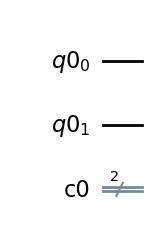

In [15]:
%matplotlib inline 
circuit.draw(output='mpl')

In [16]:
circuit.cx(qr[0], qr[1] )

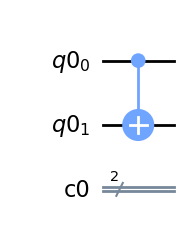

In [17]:
circuit.draw(output='mpl')

In [18]:
circuit.measure(qr, cr)

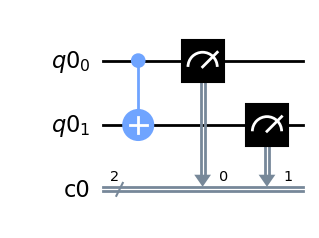

In [19]:
circuit.draw(output='mpl')

In [35]:
simulator = Aer.get_backend('qasm_simulator')

In [36]:
result = execute(circuit, backend = simulator).result()

In [37]:
from qiskit.tools.visualization import plot_histogram

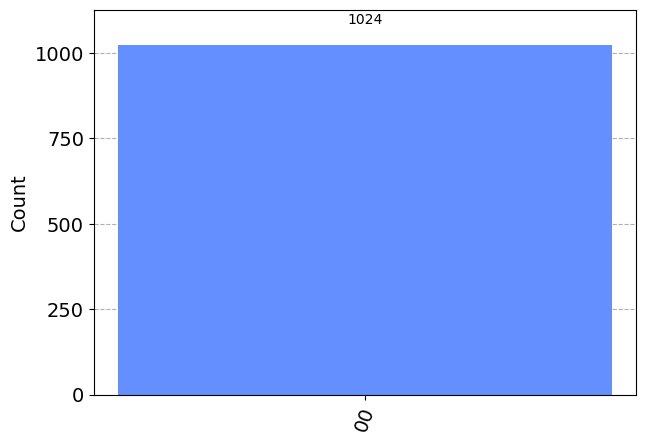

In [38]:
plot_histogram(result.get_counts(circuit))

In [39]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-08 14:51:32,615: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [40]:
provider = IBMQ.get_provider(hub ='ibm-q')

In [43]:
qcomp = provider.get_backend('ibmq_quito')


In [42]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)


ibmq_quito


In [44]:
job = execute(circuit, backend=qcomp)

In [45]:
from qiskit.tools.monitor import job_monitor

In [46]:
job_monitor(job)

Job Status: job has successfully run


In [47]:
result = job.result()

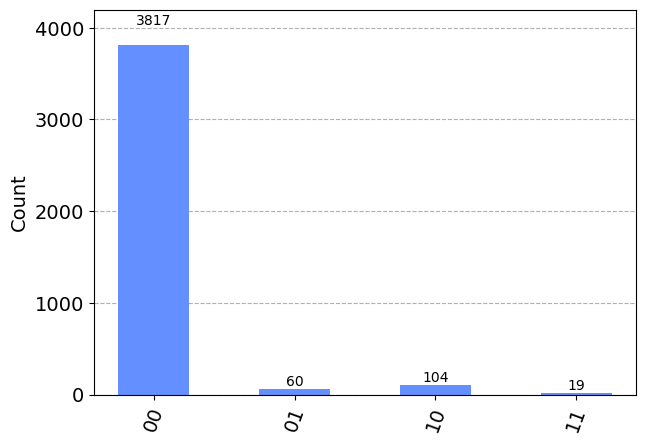

In [48]:
plot_histogram(result.get_counts(circuit))